<a href="https://colab.research.google.com/github/NikhilSingh433/Machine-learing-Project/blob/main/IPL%20Matches%20Visualization/IPL_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#import all the dependencies 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

#Data Processing 

In [11]:
#loading the data set
ipl_data = pd.read_csv("/content/matches.csv")
ipl_data.head() # showing the 5 data from the data set 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
#show the Statistics of the dataset
ipl_data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [13]:
#number of rows and columns in the dataset 
ipl_data.shape

(756, 18)

In [14]:
#total number of data in the dataset 
ipl_data.size

13608

In [15]:
#clomums in the dataset 
ipl_data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [16]:
#checking the null values in the dataset
ipl_data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [18]:
#total seasons
ipl_data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

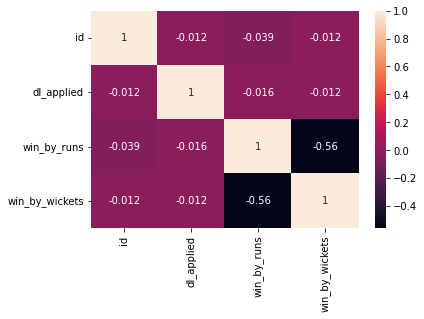

In [19]:
sns.heatmap(ipl_data.corr(),annot=True)

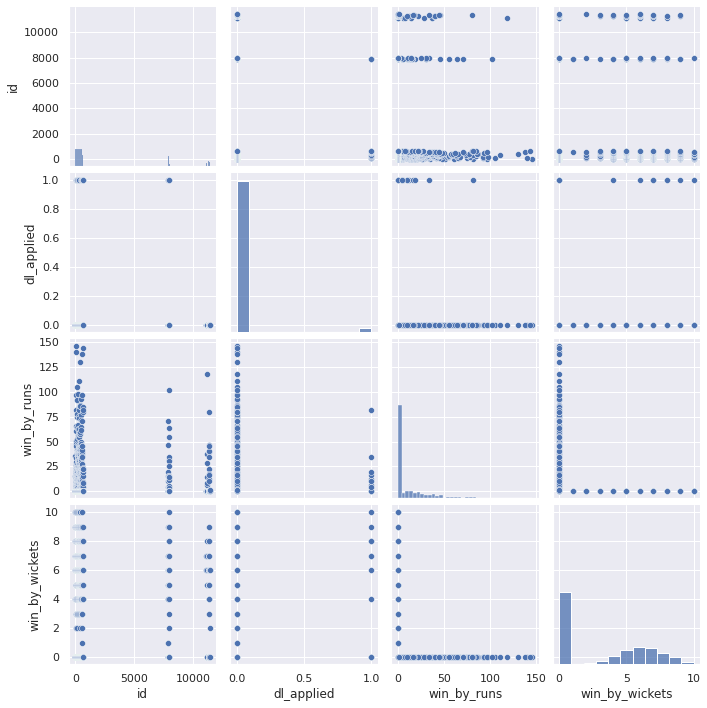

In [20]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.pairplot(ipl_data)

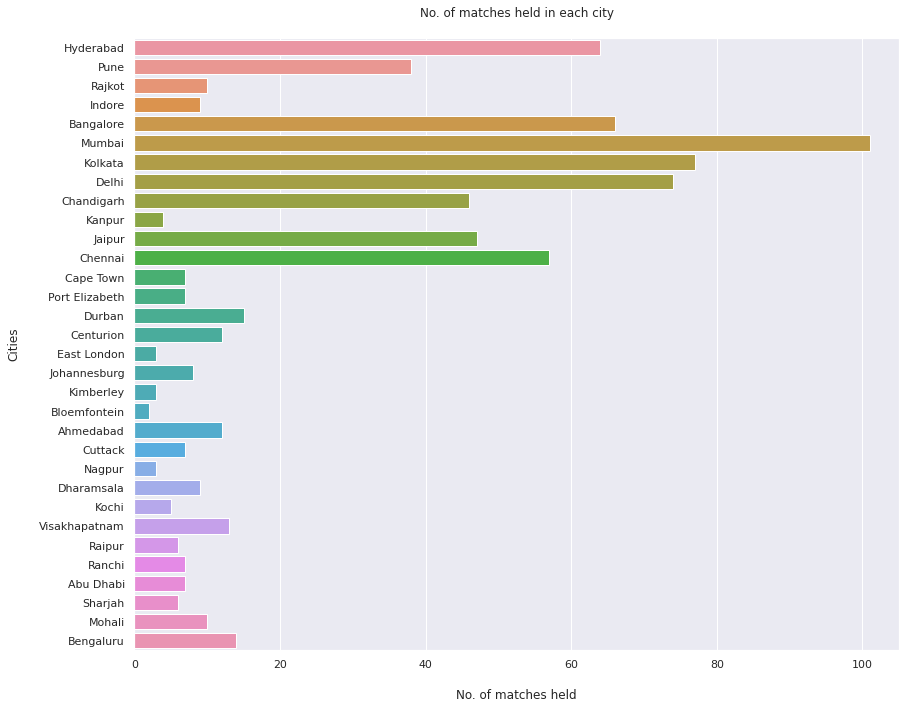

In [21]:
#number of the matches in Each cities 
# Plot to visualise the no. of matches held in each city
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.countplot(y='city', data=ipl_data)
plt.title('No. of matches held in each city\n')
plt.xlabel('\nNo. of matches held')
plt.ylabel('Cities\n')
plt.xlim([0,105])
plt.show()

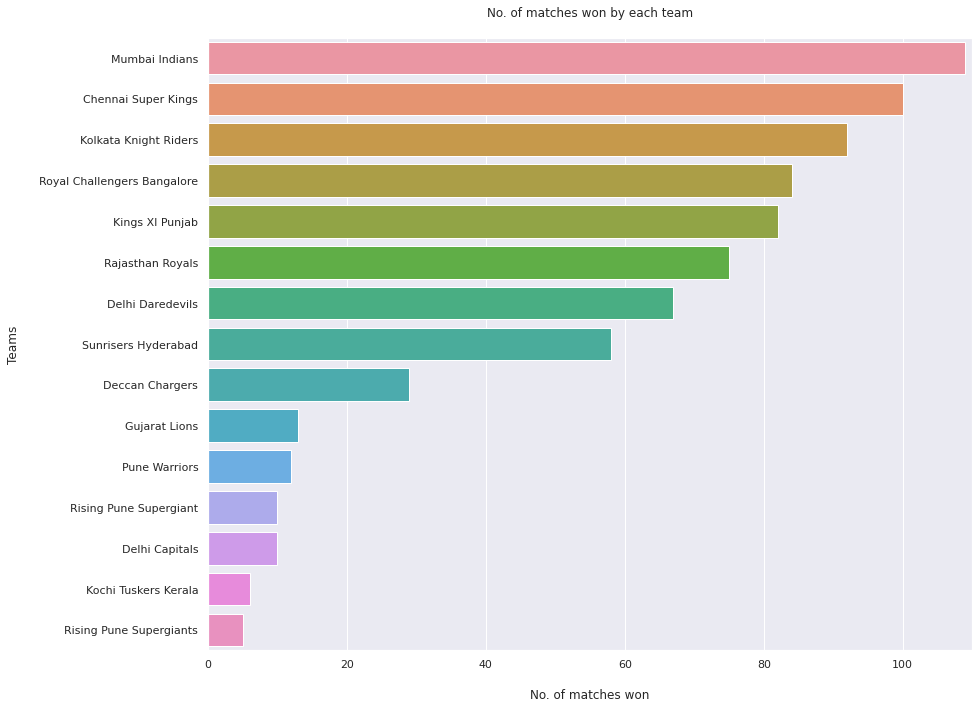

In [22]:
# Plot to visualise the no. of matches won by each team
data= ipl_data['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,110])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

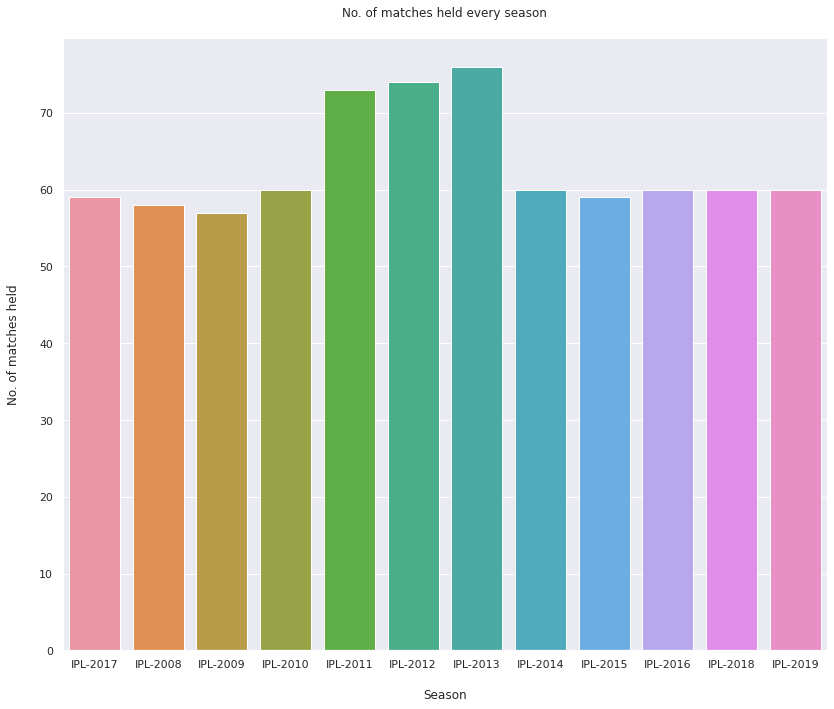

In [23]:
# Plot to visualise the no. of matches held every season
sns.countplot(x='Season', data=ipl_data)
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

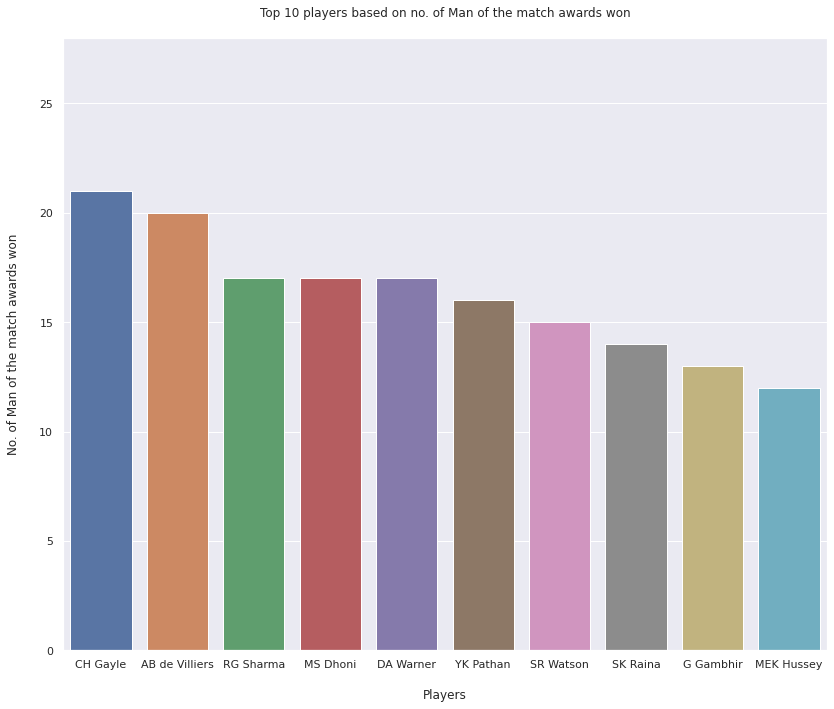

In [24]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=ipl_data['player_of_match'].value_counts()[:10]
mom
fig, ax=plt.subplots()
ax.set_ylim([0,28])
ax.set_title('Top 10 players based on no. of Man of the match awards won\n')
sns.barplot(x=mom.index, y=mom, orient='v')
plt.ylabel('No. of Man of the match awards won\n')
plt.xlabel('\nPlayers')
plt.show()

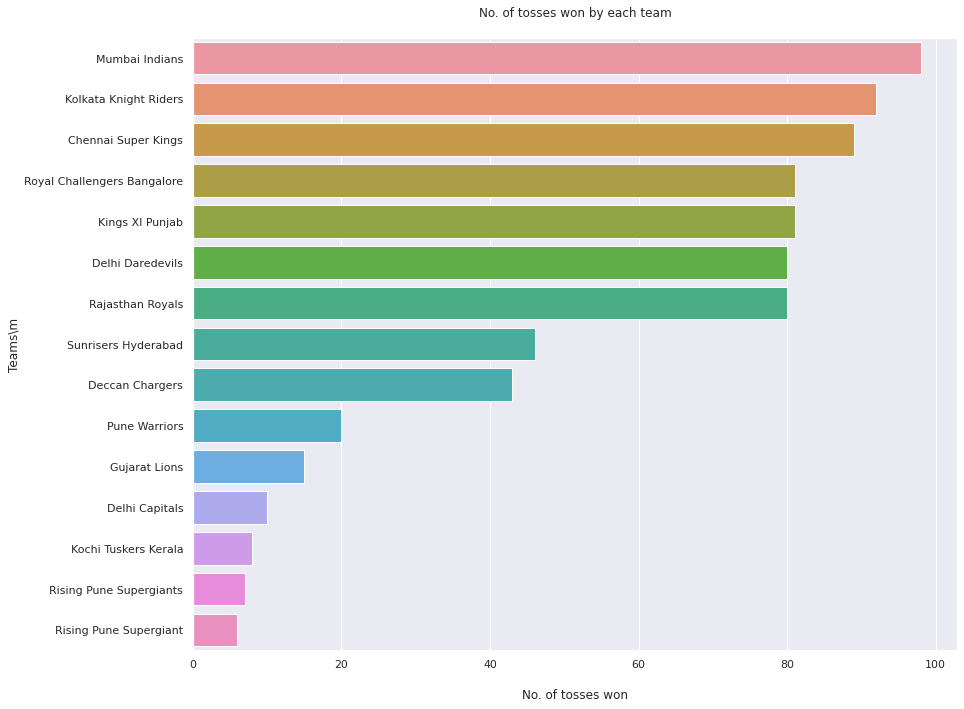

In [25]:
# Plot to visualise the no. of tosses won by each team
toss=ipl_data['toss_winner'].value_counts()
fig, ax=plt.subplots()
ax.set_title('No. of tosses won by each team\n')
sns.barplot(y=toss.index, x=toss, orient='h')
plt.xlabel('\nNo. of tosses won')
plt.ylabel('Teams\m')
plt.show()

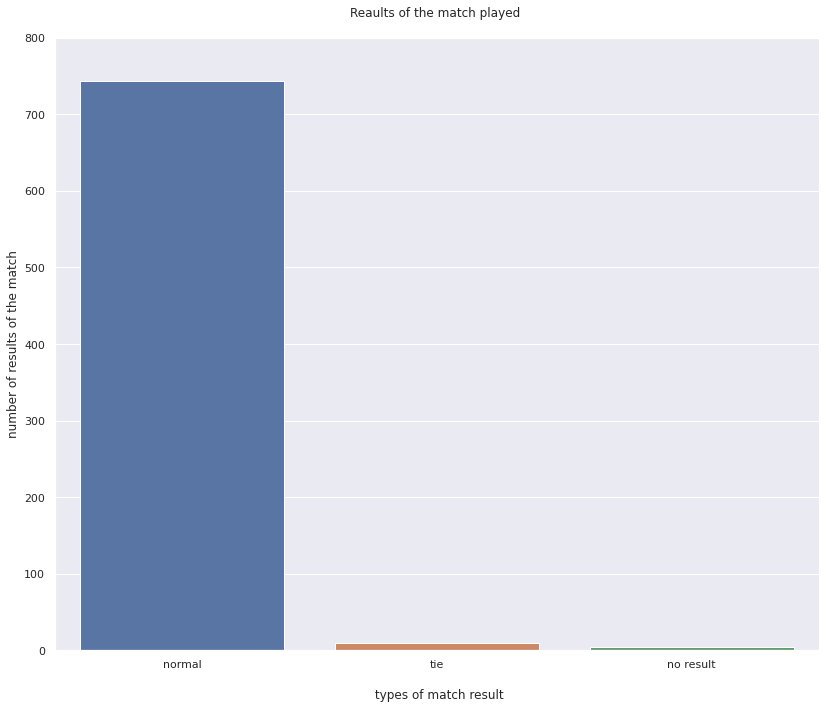

In [26]:
result=ipl_data['result'].value_counts()[:10]
fig, ax=plt.subplots()
ax.set_ylim([0,800])
ax.set_title('Reaults of the match played \n')
sns.barplot(x=result.index, y=result, orient='v')
plt.ylabel('number of results of the match')
plt.xlabel('\n types of match result')
plt.show()

#Future Matches Prediction 

**Selecting Features**


In [29]:
# Encoder
encoder = LabelEncoder()
ipl_data["team1"] = encoder.fit_transform(ipl_data["team1"])
ipl_data["team2"] = encoder.fit_transform(ipl_data["team2"])
ipl_data["winner"] = encoder.fit_transform(ipl_data["winner"].astype(str))
ipl_data["toss_winner"] = encoder.fit_transform(ipl_data["toss_winner"])
ipl_data["venue"] = encoder.fit_transform(ipl_data["venue"])

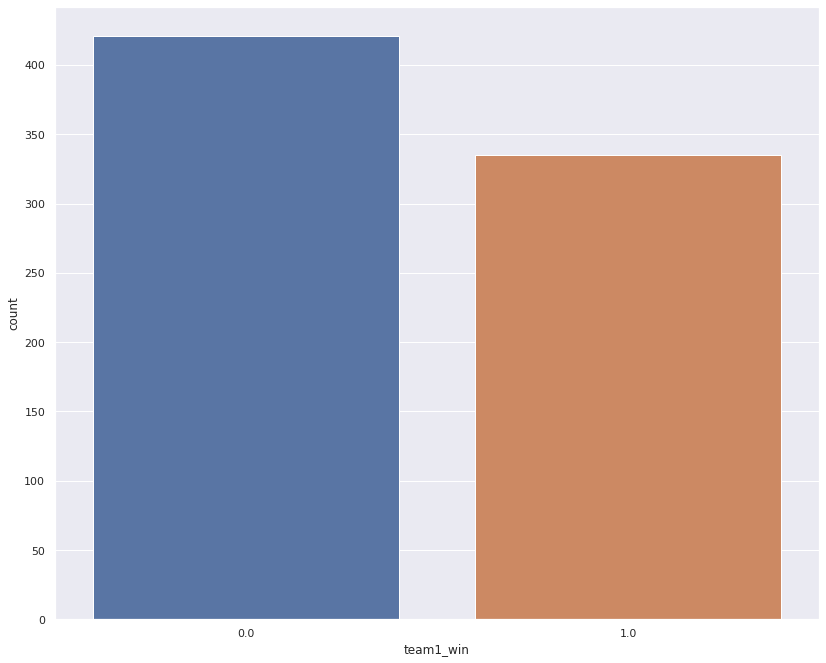

In [30]:
ipl_data.loc[ipl_data["winner"] == ipl_data["team1"], "team1_win"] = 1
ipl_data.loc[ipl_data["winner"] != ipl_data["team1"], "team1_win"] = 0

ipl_data.loc[ipl_data["toss_winner"] == ipl_data["team1"], "team1_toss_win"] = 1
ipl_data.loc[ipl_data["toss_winner"] != ipl_data["team1"], "team1_toss_win"] = 0

ipl_data["team1_bat"] = 0
ipl_data.loc[(ipl_data["team1_toss_win"] == 1) & (ipl_data["toss_decision"] == "bat") , "team1_bat"] = 1

sns.countplot(x = "team1_win" , data = ipl_data)
plt.show

prediction_df = ipl_data[["team1" , "team2" , "team1_toss_win" , "team1_bat" , "team1_win" , "venue"]]

In [31]:
correlated_features = set()
correlation_matrix = prediction_df.drop("team1_win" , axis=1).corr()
correlation_matrix

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i , j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
prediction_df.drop(columns = correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,14,13,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,13,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,14,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [33]:
X = prediction_df.drop("team1_win" , axis = 1)
target = prediction_df["team1_win"]
target = target.astype(int)

In [39]:
# Spliting of data in train data and test data
X_train , X_test , y_train , y_test = train_test_split(X , target , test_size=0.10 , random_state=2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# model
svm = SVC()
svm.fit(X_train , y_train)
svm.score(X_test , y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_pred , y_pred))
print("Accuracy : {:.4f}" .format(svm.score(X_test , y_test)) )

[[44  4]
 [25  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00         7

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

Accuracy : 0.6184
